**Agenda:**
<br>
For this tutorial in  Deep Learning(DL) with Pytorch, we are going to explore Multi Layered Perceptron architecture and learn Pytorch by implementing  algorithms under a certain usecase.We will cover the following:
1. Deep Learning basics with Pytorch
2. Multilayered Perceptron (MLP) implemention on  MNIST
<br>

[Kaggle Kernel to run this notebook](https://www.kaggle.com/u6yuvi/dl-with-pytorch-mnist-classification?scriptVersionId=9647143)

Lets get started !!


![](images/mlp.png)

# **1. Deep Learning basics with Pytorch**
<br>
In this part we will cover the following:
1. Learn to play with tensors on numpy and pytorch 
2. Learn to build a simple feed forward network from scratch with random data 
3. Learn to build an end to end MLP for MNIST dataset

##  Imports

In [1]:
!pip3 install torch torchvision

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print("List of files",os.listdir("../input"))
import torch
import numpy as np
print("Torch Version:",torch.__version__)
# Any results you write to the current directory are saved as output.

Torch Version: 1.0.0


## Helper Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


## Tensors
It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

<img src="images/tensor_examples.svg" width=600px>


### Construct a randomly initialized 5x3 matrix:




In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6379, 0.7592, 0.6302],
        [0.2110, 0.1513, 0.5589],
        [0.9906, 0.0054, 0.9263],
        [0.7238, 0.0602, 0.4015],
        [0.2661, 0.0522, 0.2575]])


### Construct a tensor directly from data:

In [4]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


### Numpy to Torch and back

PyTorch has a great feature for converting between Numpy arrays and Torch tensors. Let us see how easy it is to switch between the two

### Ceate a tensor using numpy array

In [5]:
np_array=np.random.randn(5,3)
print(f' Numpy array:\n {np_array}')

 Numpy array:
 [[ 0.29078775 -0.24078193  0.39532692]
 [-0.76269509 -0.46594533 -1.25577234]
 [-0.33151538 -0.67835184 -0.47210172]
 [-1.47579871 -0.81589375 -0.12434217]
 [-0.46677091 -0.15411824  0.216228  ]]


### Convert to torch tensor

In [6]:
torch_tensor=torch.from_numpy(np_array)
print(f'Torch tensor:\n {torch_tensor}')

Torch tensor:
 tensor([[ 0.2908, -0.2408,  0.3953],
        [-0.7627, -0.4659, -1.2558],
        [-0.3315, -0.6784, -0.4721],
        [-1.4758, -0.8159, -0.1243],
        [-0.4668, -0.1541,  0.2162]], dtype=torch.float64)


### Convert back to numpy array

In [7]:
torch_tensor.numpy()

array([[ 0.29078775, -0.24078193,  0.39532692],
       [-0.76269509, -0.46594533, -1.25577234],
       [-0.33151538, -0.67835184, -0.47210172],
       [-1.47579871, -0.81589375, -0.12434217],
       [-0.46677091, -0.15411824,  0.216228  ]])

***An important thing to note here is memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.*       
Let see what does it mean**

In [8]:
# Add 2 to PyTorch Tensor, in place
torch_tensor.add_(2)

#Anand: If we use _ after a method, that means the operations are done in-place

tensor([[2.2908, 1.7592, 2.3953],
        [1.2373, 1.5341, 0.7442],
        [1.6685, 1.3216, 1.5279],
        [0.5242, 1.1841, 1.8757],
        [1.5332, 1.8459, 2.2162]], dtype=torch.float64)

###  Numpy array matches new values from Tensor

In [9]:
np_array

array([[2.29078775, 1.75921807, 2.39532692],
       [1.23730491, 1.53405467, 0.74422766],
       [1.66848462, 1.32164816, 1.52789828],
       [0.52420129, 1.18410625, 1.87565783],
       [1.53322909, 1.84588176, 2.216228  ]])

 ## Simple Neural Network using Pytorch 
 Let us see how we can use PyTorch to build a simple neural network.
![](images/simple_neuron.PNG)

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

With the basics covered, it's time to explore how we can use PyTorch to build a simple neural network.

###  Generate some random data 
 We will create a tensor with shape (1, 5), one row and five columns, that contains values randomly distributed according to the normal distribution with a mean of zero and standard deviation of one.

In [10]:
features=torch.randn(1,3)
print(f'Number of Inout features:{features.shape[1]}')

Number of Inout features:3


### Initialize Weights and Biases 

Weights = torch.randn_like(features) creates another tensor with the same shape as features, again containing values from a normal distribution.

Finally, bias = torch.randn((1, 1)) creates a single value from a normal distribution.

In [0]:
n_input=features.shape[1]
n_hidden=2
n_output=1
#Weights for input to hidden layer
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
#Bias term for hidden and output layer
B1=torch.randn(n_hidden)
B2=torch.randn(n_output)

In [0]:
#Using a Sigmoid Activation Function
def activation(x):
    return(1/1+torch.exp(-x))

### Calculate Weight and Biases
We will calculate the output for this multi-layer network using the weights `W1` & `W2`, and the biases, `B1` & `B2`.

In [13]:
h1=activation(torch.matmul(features,W1)+B1)
print(f'Hidden Layer activations:{h1}')
out=activation(torch.matmul(h1,W2)+B2)
print(f'Output of the network:{out}')

Hidden Layer activations:tensor([[ 1.9513, 16.2414]])
Output of the network:tensor([[1.]])


## Building our Network
Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image using MNIST data
For now our goal will be to build a neural network that can take one of these images and predict the digit in the image.First, let's try to build this network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's `nn` module which provides a much more convenient and powerful method for defining network architectures.

![](images/mnist.png)

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

### Load Dataset 
First up, we need to get our dataset.Right now we will be using MNIST dataset which is already in`torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. 

In [0]:
from torchvision import datasets, transforms

#Anand(up): 'datasets' module above is used to download small in-built datasets like MNISt for learning

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              ])
#Anand(up): We can download as numpy array or as pandas. To transform our dataset to tensor, we use .ToTensor method...

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Anand(up): trainset loads the MNIST dataset and trainloader loads the dataset in batches of size 64 which will be iterated later on

#### what is dataset ?
Dataset contains two data methods `__getitem__` and `__len__` so using these methods. we can directly call a single data with index

In [16]:
# like this way
trainset[0]

#Anand(up): dataset has two inbuilt overriding methods getitem for indexing and len for getting len of a tensor. (remember IBM edX course)
#Anand(up): MNIST dataset has a dimension of 28*28 for each image

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

#### what is dataloader?

It simply uses the generator to provide data giving single- or multi-process iterators over the dataset.


We have the training data loaded into trainloader 

With dataloaded we make  an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training, like below:

In [17]:
#Anand(down): we iterate over 64 data at a time .ie. we apply a for loop over the dataset for 64 items at a time
dataiter = iter(trainloader)
#Anand(down): Assigning 64 image data into images and labels seperately
images, labels = dataiter.next()
#Anand(down): We see that type is tensor
print(type(images))
#Anand(down): Pytorch prints in Batch x Channel x Lenth x Width ...so 64 x 1 x 28 x 28
print(images.shape)
print(labels.shape)
#Printing the size of one image
#Anand(down): Numpy expects in batch x height x width x channel for visualization.
print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
(28, 28)


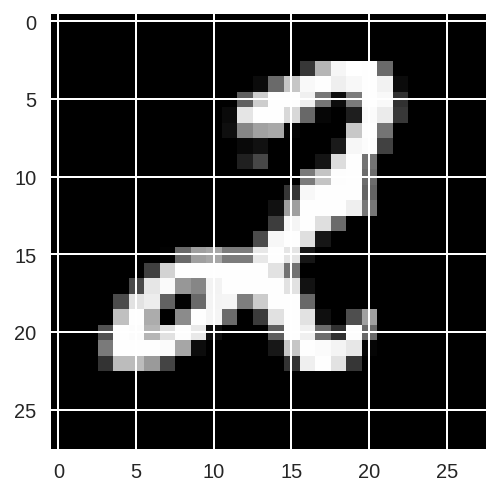

In [18]:
#Look at the image
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
#Sigmoid Activation Function
def activation(x):
    return (1/(1+torch.exp(-x)))

#Input 64x784
inputs=images.view(images.shape[0],-1)
#Number of input features-784
n_input=inputs.shape[1]
#Number of neurons in hidden layer-256
n_hidden=256
#Number of output neuron-10
n_out=10
#Weight at hidden neuron-784x256
W1=torch.randn(n_input,n_hidden)
#Bias at hidden neuron-256
B1=torch.randn(n_hidden)
#Weight at output neuron-256x10
W2=torch.randn(n_hidden,n_out)
#Bias at output neuron-10
B2=torch.randn(n_out)


In [20]:
print("Shape of a batch of an image:",images.shape)
print("Shape of the input to the network:",inputs.shape)
print("Shape of the input features:",n_input)
print("Shape of the Weight matrix of neurons in the hidden layer",W1.shape)
print("Shape of the Bias vector of neurons in the hidden layer",B1.shape)
print("Shape of the Weight matrix of neurons in the output layer",W2.shape)
print("Shape of the Bias vector of neurons in the output layer",W2.shape)


Shape of a batch of an image: torch.Size([64, 1, 28, 28])
Shape of the input to the network: torch.Size([64, 784])
Shape of the input features: 784
Shape of the Weight matrix of neurons in the hidden layer torch.Size([784, 256])
Shape of the Bias vector of neurons in the hidden layer torch.Size([256])
Shape of the Weight matrix of neurons in the output layer torch.Size([256, 10])
Shape of the Bias vector of neurons in the output layer torch.Size([256, 10])


In [0]:
#Hidden layer activations
h1=activation(torch.mm(inputs,W1)+B1)
#Output layer activations
out=activation(torch.mm(h1,W2)+B2)

#Anand (note): for matrix multiplication, both mm and matmul does the same. It is just for ease for people familiar with numpy...both does the same. See: https://github.com/myazdani/numpy-pytorch-cheatsheet

In [22]:
print(f'Shape of the Hidden activation of the network{h1.shape}')
print(f'Shape of the Output of the network{out.shape}')

Shape of the Hidden activation of the networktorch.Size([64, 256])
Shape of the Output of the networktorch.Size([64, 10])


In [23]:
#Let us see the network output to one of the feeded input image
out[1]

tensor([9.9880e-01, 1.0000e+00, 5.1209e-01, 1.0000e+00, 2.3608e-03, 1.3468e-12,
        3.8673e-04, 6.5829e-05, 1.0000e+00, 1.0000e+00])

Now we have 10 outputs for our network. This raw output is usually called **logits or scores**.
<br>
However,We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to.


### Probability Distribution using Softmax
To calculate this probability distribution, we often use the [softmax function](https://en.wikipedia.org/wiki/Softmax_function)
$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$
What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

In [0]:
def softmax(x):
    #Anand(down): we need to understand why the dimension is equal to 1. It is '1' because we need to calculate across columns (horizontally) and not across rows (vertically)...ie. first dimension
    #Anand (down): In PyTorch dimension '1' means across column and domension '0' means across row
    return(torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

Let us understand what we are doing above by an example
<br>
Step 1:Calculating the numerator of the softmax function

In [25]:
#Anand(down): is we have 64 input it is hard to visualize...so lets take only for first 2 images out of 64 images. We can see the probability of 
              #different numbers from 1 to 10 for the first image
torch.exp(out[1:3])

tensor([[2.7150, 2.7183, 1.6688, 2.7183, 1.0024, 1.0000, 1.0004, 1.0001, 2.7183,
         2.7183],
        [2.7183, 1.1796, 1.9579, 2.7168, 2.5085, 1.0000, 1.0002, 1.3614, 2.7182,
         2.7183]])

Step 2:For every predicted image output, calculate the sum over the predicted values over all classes

In [26]:
#print(torch.sum(torch.exp(out[1:3])))
#Dim=1 says, we want to take the sum across all columns
torch.sum(torch.exp(out[1:3]),dim=1)

tensor([19.2597, 19.8791])

Step3:Rearrange the sums in an order for broadcasting to work

In [27]:
torch.sum(torch.exp(out[1:3]),dim=1).view(-1,1)

tensor([[19.2597],
        [19.8791]])

Step 3:For every predicted image output, divide the predictions of each class with the sum over all classes.

In [28]:
#print(torch.exp(out[1:3])/torch.sum(torch.exp(out[1:3]),dim=1))
temp=torch.exp(out[1:3])/torch.sum(torch.exp(out[1:3]),dim=1).view(-1,1)
print(temp)

tensor([[0.1410, 0.1411, 0.0866, 0.1411, 0.0520, 0.0519, 0.0519, 0.0519, 0.1411,
         0.1411],
        [0.1367, 0.0593, 0.0985, 0.1367, 0.1262, 0.0503, 0.0503, 0.0685, 0.1367,
         0.1367]])


Voila!! We got the softmax output .One last thing to do is check whether the sum across all classes sum to 1 for understanding the predicted class

In [29]:
temp.sum(dim=1)

tensor([1., 1.])

In [30]:
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
#print(probabilities.sum(dim=1))

torch.Size([64, 10])


## Building our Network with Pytorch

![](images/mlp_mnist.png)

PyTorch provides a module `nn` that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  #Anand (down): In init, we define all the layers we want to use. 
  def __init__(self):
        super().__init__()
        #Anand (down): nn.linear means arrange all the pixels linearly...like here we want the 28x28 to be in linear of 784
        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)
        #Anand (down): we are using 2 fns- Sigmod fn is used for input and hidden layers AND softmax for output layer.
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
    
   #Anand (down): Here, 'x' is the input layer which is our 784 images. What we are doing is telling the sequence of operations. Here, pass x to hidden layer, 
         #then to apply sigmoid fn, then to output layer and then apply softmax fn.
   #Anand (down): Here, we are overriding the forward() method as we want.
  def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x
      
    #Anand (down): Actually, we also have to give backward() override. But, we will be suing autograd fn which includes the backpropagation fn. If we are using a custom loss fn, then, we also have to give a backward() method in this class

Let's go through this bit by bit.

```python
class Network(nn.Module):
```

Here we're inheriting from `nn.Module`. Combined with `super().__init__()` this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from `nn.Module` when you're creating a class for your network. The name of the class itself can be anything.

```python
self.hidden = nn.Linear(784, 256)
```

This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to `self.hidden`. The module automatically creates the weight and bias tensors which we'll use in the `forward` method. You can access the weight and bias tensors once the network once it's create at `net.hidden.weight` and `net.hidden.bias`.

```python
self.output = nn.Linear(256, 10)
```

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

Here I defined operations for the sigmoid activation and softmax output. Setting `dim=1` in `nn.Softmax(dim=1)` calculates softmax across the columns.

```python
def forward(self, x):
```

PyTorch networks created with `nn.Module` must have a `forward` method defined. It takes in a tensor `x` and passes it through the operations you defined in the `__init__` method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

Here the input tensor `x` is passed through each operation a reassigned to `x`. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the `__init__` method doesn't matter, but you'll need to sequence the operations correctly in the `forward` method.

Now we can create a `Network` object.

In [33]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

We can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`, `import torch.nn.functional as F`.


In [0]:
#Anand (down): In Pytroch, we define all our layers using .nn 
#Anand (down): Whenever we want to use loss fns, we use .functional...Tis way we don;t have to define them in our __init__ 
import torch.nn.functional as F

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        #Anand (down): The x=x.hidden() is given in one step and passed into sigmoid fn for readability purpose.
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [36]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and bias are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [37]:
#Anand (down): model.<layer-name>.weight gives the weights
#Anand (down): Similarly, model.<layer-name>.weight.shape gives the shape of the weight
print(model.hidden.weight,model.hidden.weight.shape)


#Anand (down): model.<layer-name>.bias gives the biases
#Anand (down): Similarly, model.<layer-name>.bias.shape gives the shape of the biases
print(model.hidden.bias,model.hidden.bias.shape)

#Anand (note): requires_grad= True allows backward propagation. If it is False, we can't do backpropagation. 'False' is used when we want to freeze our n/w

Parameter containing:
tensor([[-0.0225,  0.0081, -0.0315,  ...,  0.0345,  0.0303,  0.0008],
        [-0.0217,  0.0066, -0.0025,  ...,  0.0286, -0.0233,  0.0324],
        [-0.0082,  0.0054,  0.0215,  ..., -0.0149, -0.0248,  0.0345],
        ...,
        [-0.0146,  0.0105,  0.0036,  ..., -0.0126,  0.0107, -0.0047],
        [ 0.0258,  0.0241, -0.0151,  ...,  0.0286, -0.0334, -0.0001],
        [ 0.0139, -0.0043, -0.0269,  ...,  0.0014,  0.0285, -0.0149]],
       requires_grad=True) torch.Size([128, 784])
Parameter containing:
tensor([-0.0291,  0.0250,  0.0277,  0.0074,  0.0071, -0.0084, -0.0290, -0.0333,
        -0.0275,  0.0011, -0.0295, -0.0017, -0.0242, -0.0063,  0.0033, -0.0149,
         0.0043, -0.0291,  0.0106, -0.0201,  0.0275,  0.0008, -0.0250, -0.0203,
        -0.0119,  0.0232,  0.0178, -0.0254, -0.0263,  0.0216,  0.0039,  0.0232,
        -0.0148,  0.0291,  0.0248,  0.0268,  0.0165, -0.0275,  0.0212,  0.0131,
         0.0164,  0.0044,  0.0341, -0.0304,  0.0263, -0.0291, -0.0085,  

For custom initialization, we can these tensors in place.

In [38]:
# Set biases to all zeros
#Anand (down): If we want to manipulate the data of a tensor, we use the .data. Here, we are filling the data of bias with zero for initial
model.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01)

tensor([[-0.0072,  0.0176,  0.0071,  ..., -0.0210,  0.0149, -0.0031],
        [-0.0083,  0.0044,  0.0141,  ..., -0.0083, -0.0009, -0.0056],
        [-0.0036, -0.0019, -0.0021,  ...,  0.0056,  0.0075, -0.0117],
        ...,
        [ 0.0150,  0.0050,  0.0055,  ..., -0.0175, -0.0112, -0.0103],
        [-0.0067, -0.0020, -0.0043,  ..., -0.0066, -0.0065, -0.0157],
        [-0.0062,  0.0039, -0.0023,  ..., -0.0064,  0.0127, -0.0014]])

In [0]:
netowrk=Network()

### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


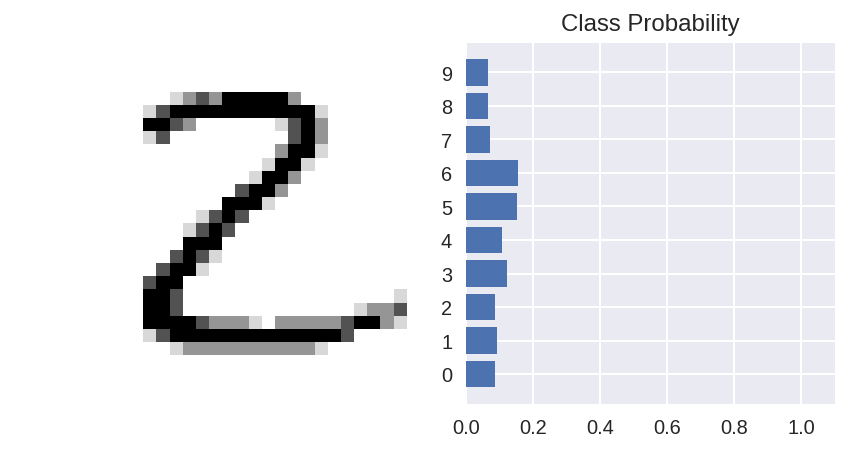

In [41]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
#Anand (down): Making into a flat thing..ie. making into a single line. Here, images.shape[0] means we are currently passing only the first image
images.resize_(images.shape[0], 1, 784)

# Forward pass through the network
#Anand (down): Image index=0 .ie. the first image...Then, performing a forward pass on only the first image (we already trained the model)
img_idx = 0 
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, , all the weights are random!

## Add-on-People from the keras would love this!!!
PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential`.
Lets try to build the above network using this method:

In [42]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128]
output_size = 10

#Anand (down): nn.sequential is used when we have a set of sequemtial layers. We are using RelU...we can even use sigmoid
model=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0],output_size),
                    nn.ReLU(),
                    nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): ReLU()
  (4): Softmax()
)


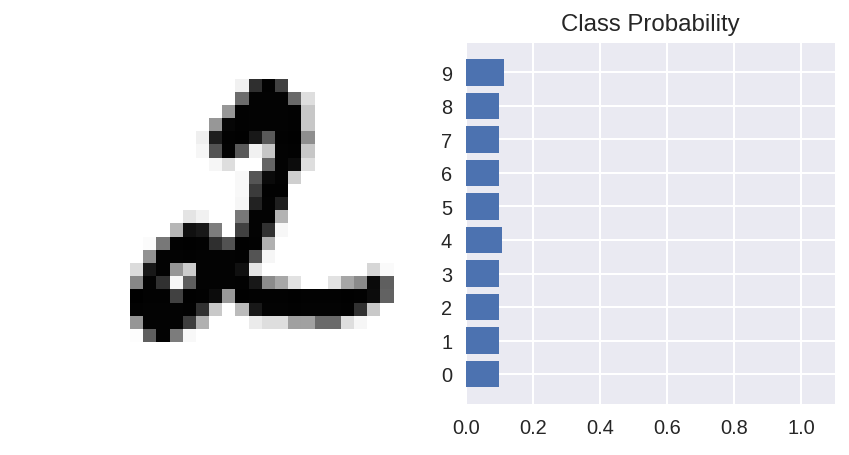

In [43]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

### Access Layers of the network
We can access layers  by integer 

In [44]:
#Anand (down): model[0] is the first layer output. 
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0206,  0.0214, -0.0124,  ...,  0.0244, -0.0306,  0.0187],
        [-0.0165, -0.0134,  0.0105,  ...,  0.0070,  0.0239,  0.0059],
        [ 0.0311, -0.0173, -0.0168,  ...,  0.0215, -0.0004, -0.0254],
        ...,
        [-0.0282,  0.0107,  0.0204,  ..., -0.0003, -0.0239,  0.0140],
        [-0.0207, -0.0128,  0.0327,  ...,  0.0155, -0.0293,  0.0346],
        [-0.0067, -0.0233, -0.0084,  ...,  0.0226,  0.0266,  0.0131]],
       requires_grad=True)

### Ordered Dict- Better way to create a network
We can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [45]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('hidden', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[0], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax()
)

### Access Layers using integer or name 
Now we can access layers  either by integer or name

In [46]:
print(model[0])
print(model.hidden)
print(model.hidden.weight)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[-1.6818e-03, -9.4320e-03, -2.9041e-02,  ..., -8.4733e-03,
         -1.3702e-02,  2.4871e-02],
        [-6.4225e-03,  1.1425e-02, -6.6743e-04,  ...,  1.9467e-02,
         -3.5642e-02, -1.2637e-02],
        [ 2.7824e-02,  2.0677e-02,  1.3983e-02,  ...,  9.2808e-03,
          1.8387e-02, -1.2967e-02],
        ...,
        [-1.6838e-02, -2.7560e-02,  1.1889e-02,  ...,  1.6769e-03,
         -2.5749e-02,  3.3788e-02],
        [-9.2459e-03, -2.0910e-05,  9.9962e-03,  ...,  1.4970e-02,
         -1.9747e-02, -3.4973e-02],
        [-2.1697e-02,  2.7523e-02, -4.4115e-03,  ..., -1.6222e-02,
         -2.2439e-02,  1.3916e-02]], requires_grad=True)


### Recollect everything 
Before we go ahead and train a neural network to accuractly predict the numbers appearing in the MNIST images,let us recollect the important modules that is necessary for any model training exercise

#### Imports

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms

#### Load Data

In [0]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

#Anand (down): We are using batch size of 64. We choose batch size based on GPU and meory size. If very powerful GPU, we can even load the entire dataset at once.
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)

#### Build a feedforward Network

In [0]:
# TODO: Build a feed-forward network in one of the three ways mentioned above:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


#### Lets run one image through the network to check our work

In [50]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
#Anand (down): .view in PyTorch does a reshape operation to whatever shape we want. Usually, we use -1 because we don't know the exact ending dimension.
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
#Anand (down): logits can be considered as the output of the model....ie. the calculated values
logits = model(images)
print(logits.shape)

torch.Size([64, 10])


#### Define a loss function

In [0]:
#Anand (down): NLL is Negative Log Le..will be covered in upcoming sessions...In PyToch criterion is the name for loss fn
criterion = nn.NLLLoss()

#Anand (note): Instead of .NLLLoss(), we can also use CrossEntropy()

In [52]:
# Calculate the loss with the logits and the labels
loss=criterion(logits,labels)
print(loss)

tensor(2.3122, grad_fn=<NllLossBackward>)


## Autograd

Now that we know how to calculate a loss, how do we use it to perform backpropagation? Torch provides a module, `autograd`, for automatically calculating the gradients of tensors. We can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way.

PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set `requires_grad = True` on a tensor. You can do this at creation with the `requires_grad` keyword, or at any time with `x.requires_grad_(True)`.


Let's see an example to understand it better.Then again we will head back to our modelling task

In [53]:
#Anand (down): Backpropagation is done below for an example functionn of y=x^2
x = torch.randn(2,2, requires_grad=True)
print(x)
y = x**2
print(y)
## grad_fn shows the function that generated this variable
print(y.grad_fn)
z = y.mean()
print(z)
#Anand (down): Below, if we do x.grad before doing backpropagation .ie. differentiation, we get None (remember IBM DL class)
print(x.grad)
z.backward()
#Anand (down): Below, if we do x.grad after doing backpropagation .ie. differentiation, we get the differentiated value
print(x.grad)
print(x/2)

tensor([[-1.4558, -1.4075],
        [ 0.0460, -1.7109]], requires_grad=True)
tensor([[2.1193e+00, 1.9810e+00],
        [2.1144e-03, 2.9271e+00]], grad_fn=<PowBackward0>)
tensor(1.7574, grad_fn=<MeanBackward1>)
None
tensor([[-0.7279, -0.7037],
        [ 0.0230, -0.8554]])
tensor([[-0.7279, -0.7037],
        [ 0.0230, -0.8554]], grad_fn=<DivBackward0>)


## Loss and Autograd together

In [57]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

#Anand (down): logits is the log of the output. Can also be renamed output for our understanding
logits = model(images)
#Anand (down): loss will give one single loss value
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## Defining the optimizer

In [0]:
from torch import optim
optimizer=optim.Adam(model.parameters(),lr=0.1)

## Training for real

In [59]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        output=model.forward(images)
        # TODO: Training pass
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        #Anand (down): zero_grad means we are not allowing the model to accumulate the gradients. ie. next time it is run, we don't want to do a second order differenation. So, after every pass, it resets the old gradients
        optimizer.zero_grad()
        
        #Anand (down): For every iteration where the dataset (here: every batch of 64 images) is getting exhausted, it is calculating the running_loss
        #Anand (down): loss.item() will give the value of loss. .shape[0] will give the loss for number of images (for eg, one batch could have 64 images, other batch could have only 10 images. So we are scaling that loss by number of imaes in that batch)
        running_loss += loss.item()* images.shape[0]
    else:
        print(f"Epoch:{e} Training loss: {running_loss/len(trainloader.dataset)}")

Epoch:0 Training loss: 1.1782748711585997
Epoch:1 Training loss: 1.517994990348816
Epoch:2 Training loss: 1.6252919858296713
Epoch:3 Training loss: 1.9030922147750855
Epoch:4 Training loss: 1.871261965751648


In [0]:
%matplotlib inline
#import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
#helper.view_classify(img.view(1, 28, 28), ps)

## Inference and Validation

The goal of validation is to measure the model's performance on data that isn't part of the training set. Typically this is just accuracy, the percentage of classes the network predicted correctly. Other options are precision and recall and top-5 error rate. We'll focus on accuracy here. First I'll do a forward pass with one batch from the test set.

### Inference on a batch of images
Let us try to do this for a batch of images.Before that we will make some changes in our architecture

In [0]:
images, labels = next(iter(testloader))
images.shape,labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [0]:
images, labels = next(iter(testloader))
img = images.view(images.shape[0], 784)
# Get the class probabilities
ps = torch.exp(model(img))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [0]:
top_prob,top_class=ps.topk(1,dim=1)
top_prob.shape,top_class.shape

(torch.Size([64, 1]), torch.Size([64, 1]))

In [0]:
top_class.view(64)

tensor([8, 1, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 8, 1, 1, 1, 8, 1, 8, 8, 2, 8, 1, 2,
        8, 1, 8, 8, 8, 1, 1, 8, 8, 8, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 8, 8, 1,
        2, 1, 1, 8, 1, 1, 8, 8, 8, 1, 1, 8, 1, 1, 8, 1])

In [0]:
import pandas as pd
pd.DataFrame({"Predicted":top_class.view(top_class.shape[0]),"Actual":labels})

,Predicted,Actual
0,1,7
1,1,0
2,1,4
3,1,4
4,1,4
5,1,5
6,1,3
7,1,3
8,1,3
9,1,3


In [0]:
equals=top_class == labels.view(*top_class.shape)
accuracy=torch.mean(equals.type(torch.FloatTensor))
accuracy.item()

0.046875

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

In [0]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        #Anand (down): We MUST put torch to no_grad since during testing, we don't want to compute gradients.
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))    

Epoch: 1/5..  Training Loss: 0.405..  Test Loss: 0.216..  Test Accuracy: 0.945
Epoch: 2/5..  Training Loss: 0.312..  Test Loss: 0.174..  Test Accuracy: 0.958
Epoch: 3/5..  Training Loss: 0.283..  Test Loss: 0.190..  Test Accuracy: 0.957
Epoch: 4/5..  Training Loss: 0.272..  Test Loss: 0.189..  Test Accuracy: 0.960
Epoch: 5/5..  Training Loss: 0.272..  Test Loss: 0.165..  Test Accuracy: 0.963


In [0]:
running_loss

114.80688328295946

In [0]:
torch.tensor([1,2,3])==torch.tensor([1,3,2])

tensor([1, 0, 0], dtype=torch.uint8)

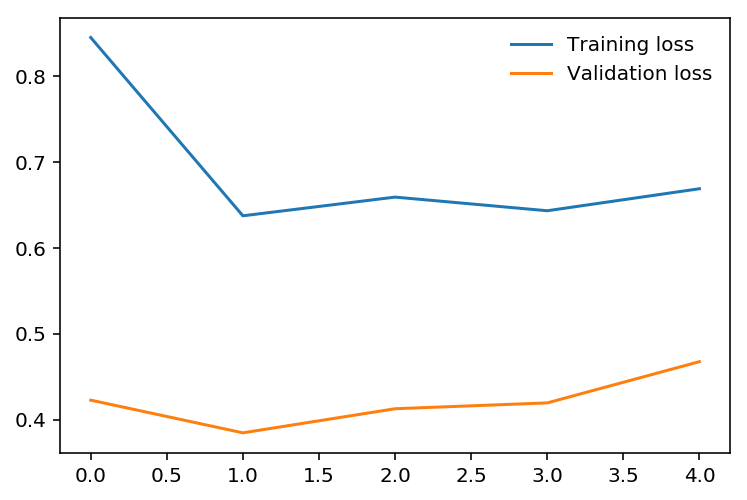

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Inference time

In [0]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
top_prob,top_class=ps.topk(1,dim=1)
top_class.item(),labels[0]

(0, tensor(0))

The parameters for PyTorch networks are stored in a model's state_dict
 Optimizer objects (torch.optim) also have a state_dict, which contains information about the optimizer’s state, as well as the hyperparameters used.

Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

In [0]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([256, 784])
fc1.bias 	 torch.Size([256])
fc2.weight 	 torch.Size([128, 256])
fc2.bias 	 torch.Size([128])
fc3.weight 	 torch.Size([64, 128])
fc3.bias 	 torch.Size([64])
fc4.weight 	 torch.Size([10, 64])
fc4.bias 	 torch.Size([10])


In [0]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {139938764448248: {'step': 4690, 'exp_avg': tensor([[-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45]]), 'exp_avg_sq': tensor([[1.0672e-12, 1.0672e-12, 1.0672e-12,  ..., 1.0672e-12, 1.0672e-12,
         1.0672e-12],
        [5.6438e-12, 5.6438e-12, 5.6438e-12,  ..., 5.6438e-12, 5.6438e-12,
         5.6438e-12],
        [2.6544e-12, 2.6544e-12, 2.6544e-12,  ..., 2.6544e-12, 2.6544e-12,
        

# Kaggle- Multilayered Perceptron (MLP) implemention on MNIST dataset
Untill now we were using the MNIST dataset that is available in torchvision.dataset.Let us now load the dataset from Kaggle repo and train our model

In [0]:
import os
from pathlib import Path
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
PATH=Path("../input/digit-recognizer")
print(os.listdir("../input/digit-recognizer"))

['train.csv', 'sample_submission.csv', 'test.csv']


## Load Data 

In [0]:
train=pd.read_csv(PATH/'train.csv')
test=pd.read_csv(PATH/'test.csv')
train.shape,test.shape

((42000, 785), (28000, 784))

## Extracting Input and Target Variable

In [0]:
x=train.drop("label",axis=1)
y=np.array(train['label'])
x.shape,y.shape

((42000, 784), (42000,))

## Normalization 

In [0]:
#x_train=x/255

## Train Test Split

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

## Train Test in Pytorch

In [0]:
'''
# create feature and targets tensor for train set.
torch_X_train = torch.from_numpy(x_train.values).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(x_test.values).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
'''

'\n# create feature and targets tensor for train set.\ntorch_X_train = torch.from_numpy(x_train.values).type(torch.FloatTensor)\ntorch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)\n\n# create feature and targets tensor for test set.\ntorch_X_test = torch.from_numpy(x_test.values).type(torch.FloatTensor)\ntorch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)\n\n# Pytorch train and test sets\ntrain = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)\ntest = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)\n'

In [0]:
'''
BATCH_SIZE=64
# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)
'''

'\nBATCH_SIZE=64\n# data loader\ntrain_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)\ntest_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)\n'

## Train -Test Split -Pytorch

In [0]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

len of trainSet 33600 , len of testSet 8400


trainData = torch.from_numpy(x_train.values)
trainLabel=torch.from_numpy(y_train)
testData = torch.from_numpy(x_test.values)
testLabel = torch.from_numpy(y_test)
trainData, testData = trainData.type(torch.FloatTensor), testData.type(torch.LongTensor)
trainLabel, testLabel = trainLabel.type(torch.FloatTensor), testLabel.type(torch.LongTensor)
trainData.shape,testData.shape
trainData = trainData.unsqueeze_(dim=1)
testData = testData.unsqueeze_(dim=1)
trainData.shape,testData.shape
transforms =transforms.Compose(transforms.ToTensor())
train_dataset = TensorDataset(trainData,trainLabel)
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)

test_dataset = TensorDataset(testData,testLabel)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

## Network

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

## Train 

In [0]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

Epoch: 1/5..  Training Loss: 0.446..  Test Loss: 0.214..  Test Accuracy: 0.943
Epoch: 2/5..  Training Loss: 0.307..  Test Loss: 0.192..  Test Accuracy: 0.953
Epoch: 3/5..  Training Loss: 0.286..  Test Loss: 0.231..  Test Accuracy: 0.948
Epoch: 4/5..  Training Loss: 0.280..  Test Loss: 0.199..  Test Accuracy: 0.949
Epoch: 5/5..  Training Loss: 0.267..  Test Loss: 0.206..  Test Accuracy: 0.953


## Save our model

In [0]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

## Load our model

In [0]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
model.load_state_dict(state_dict)

In [0]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [256,128,64],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

## Load Test Data

In [0]:
test_images = pd.read_csv("../input/digit-recognizer/test.csv")
test_image = test_images.loc[:,test_images.columns != "label"].values
test_dataset = torch.from_numpy(test_image).type(torch.FloatTensor)/255
print(test_dataset.shape)
#test_dataset = torch.utils.data.TensorDataset(test_dataset)
new_test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100, shuffle = False)

torch.Size([28000, 784])


In [0]:
results = []
with torch.no_grad():
    model.eval()
    for images in new_test_loader:
        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim = 1)
        results += top_class.numpy().tolist()

## Check the results

In [0]:
predictions = np.array(results).flatten()
print(predictions[:5])
print(predictions.shape)

[2 0 9 8 3]
(28000,)


## Submit for Scoring

In [0]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("my_submissions.csv", index=False, header=True)

# Reference

[Introduction to Pytorch-Udacity](https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch)